In [1]:
import pandas as pd

df_covid_AP = pd.read_csv('../lung_pollution/data/covid_pollution_clean02.csv')

df_covid_AP.drop(columns='Unnamed: 0', inplace = True)
df_covid_AP = df_covid_AP.rename(columns={"PM2.5_annualMean": "PM2_5_annualMean", "fully_vaccinated": "Fully_vaccinated", "Population density": "Population_density"})

In [2]:
df_covid_AP.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k',
       'Fully_vaccinated', 'Population_density'],
      dtype='object')

In [2]:
df_covid_AP.sort_values(['year'], axis=0, ascending=False,inplace=True,ignore_index=True)
df_covid_AP_2019 = df_covid_AP[0:400]

In [3]:
import numpy as np

In [5]:
X_train = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax','PM2_5_annualMean']]

y_train = df_covid_AP_2019[['cases_per_100k']]

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [6]:
X_train.shape

(400, 8)

In [16]:
X_train = X_train[['lnNO2','lnO3','lnPM2_5']]
X_train.describe()

,lnNO2,lnO3,lnPM2_5
count,400.000000,400.000000,400.000000
mean,2.719541,5.109161,2.481918
std,0.370334,0.077120,0.127173
min,1.026042,4.866996,1.719189
25%,2.666534,5.086902,2.486572
50%,2.813611,5.091139,2.519710
75%,2.890927,5.105021,2.539237
max,3.486457,5.519459,2.932260


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciate Robust Scaler

scaler.fit(X_train)  # Fit scaler to feature
scaled_num = scaler.transform(X_train)  #Scale
X_train = pd.DataFrame(scaled_num, columns = X_train.columns)

In [23]:
np.isfinite(X_train.all())

lnNO2      True
lnO3       True
lnPM2_5    True
dtype: bool

In [24]:
from sklearn.ensemble import  RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=201)

forest.fit(X_train,y_train)

print('R2 RandomForest: ', forest.score(X_train,y_train))


/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_87568/3732284810.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


R2 RandomForest:  0.6401193251978887


In [28]:
import seaborn as sns

NameError: name 'y_pred_vaxx' is not defined

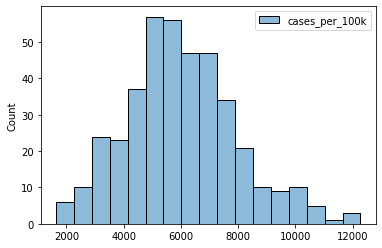

In [29]:
sns.histplot(y_train, color='blue')
sns.histplot(y_pred_vaxx, color='green')

In [30]:
X_explore = df_covid_AP_2019[['lnNO2','lnO3','lnPM2_5']]
X_explore.head()

KeyError: "None of [Index(['lnNO2', 'lnO3', 'lnPM2_5'], dtype='object')] are in the [columns]"

In [27]:
NO2mean = X_explore[['NO2_annualMean']].mean()
NO2target = 10
NO2_red = NO2target/NO2mean
NO2_red

NO2_annualMean    0.622355
dtype: float64

In [ ]:
O3mean = X_explore[['O3_daily8HrMax']].mean()
O3target = 100
O3_red = O3target/O3mean
O3_red

In [ ]:
PM25mean = X_explore[['PM2_5_annualMean']].mean()
PM25target = 5
PM25_red = PM25target/PM25mean
PM25_red

In [ ]:
X_explore.head()

In [ ]:
X_explore[['NO2_annualMean']] = X_explore[['NO2_annualMean']] * 0.622355
X_explore[['O3_daily8HrMax']] = X_explore[['O3_daily8HrMax']] * 0.602246
X_explore[['PM2_5_annualMean']] = X_explore[['PM2_5_annualMean']] * 0.414837
X_explore.head()

In [ ]:
scaled_test_explore = scaler.transform(X_explore)

In [ ]:
y_pred_explore = forest.predict(scaled_test_explore)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(y_pred_explore, color='red', binwidth = 666)
sns.histplot(y_train, color='blue')

In [8]:
df_covid_AP = pd.read_csv('../lung_pollution/data/covid_pollution_clean02.csv')
df_covid_AP.columns

Index(['Unnamed: 0', 'county', 'year', 'NO2_annualMean', 'NO2_hrOver200',
       'NO_annualMean', 'O3_annualMean', 'O3_daysOver120',
       'O3_dailyMaxAnnualMean', 'O3_dailyHourlyMax', 'O3_daily8HrMax',
       'PM10_annualMean', 'PM10_daysOver50', 'PM2_5_annualMean', 'BL', 'EWZ',
       'Shape__Area', 'death_rate', 'cases', 'deaths', 'cases_per_100k',
       'deaths_per_100k', 'fully_vaccinated', 'Population_density'],
      dtype='object')

In [10]:
df_covid_AP[['NO2_annualMean']] = df_covid_AP[['NO2_annualMean']] * 0.622355
df_covid_AP[['O3_daily8HrMax']] = df_covid_AP[['O3_daily8HrMax']] * 0.602246
df_covid_AP[['PM2_5_annualMean']] = df_covid_AP[['PM2_5_annualMean']] * 0.414837
df_covid_AP.sort_values(['year'], axis=0, ascending=False,inplace=True,ignore_index=True)
df_covid_AP= df_covid_AP[0:20]

In [11]:
df_covid_AP.to_csv('test.csv')